# ensemble

- 여러 개의 머신러닝 모델을 결합함으로써 보다 정확한 예측을 할 수 있게 해주는 방법
- bagging, boosting

## bagging(배깅)

- 데이터 샘플링을 통해 여러 모델을 학습한 후, 결과를 집계하는 방법
- 모두 같은 알고리즘으로 구성
- 과적합 방지
- 대표 알고리즘: RandomForest

## boosting(부스팅)

- 여러 모델이 순차적으로 이전 오차를 줄이는 방향으로 학습 진행
- 이전 모델일 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 모델에 가중치를 부여하는 방식
- 예측 성능이 뛰어남. 앙상블 학습에서 가장 각광받는 방식
- 속도가 느림
- 대표 알고리즘: XGBoost, LightGBM

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [5]:
cal_house_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
cal_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
cal_house_df['Price($)'] = dataset.target * 100000
cal_house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price($)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [7]:
from sklearn.model_selection import train_test_split

X = cal_house_df.drop('Price($)', axis = 1)     # 예측에 사용할 변수
y = cal_house_df['Price($)']     # 예측할 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, shuffle = True)

In [8]:
from sklearn.linear_model import LinearRegression

# 다중 선형 회귀 모델 학습

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# 예측 결과 확인

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = mlr_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print('MAE: {}'.format(round(mae, 2)))
print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse, 2)))
print('R2: {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE: 54273.6
MSE: 5703425914.69
RMSE: 75521.03
R2: 0.63
adj_R2: 0.62


# Random Forest

- 배깅 알고리즘
- 성능이 우수해서 널리 사용됨
- 의사결정나무 성능을 개선시키기 위해 여러 개의 나무를 만들어서 각 나무들의 예측 결과를 조합해 최종 결정을 내림
- 각 나무마다 랜덤하게 데이터를 샘플링(복원 추출): 각 나무마다 훈련하는 데이터가 다름
- 다수의 나무가 결정한 값으로 최종 결정을 내림
- 나무 개수가 많을수록 정확도는 개선되지만, 일정 지점이 넘으면 급격히 안좋아짐
- 분류, 회귀 문제 모두 적용 가능

In [11]:
from sklearn.ensemble import RandomForestRegressor     # 회귀. 분류문제라면 RandomForestClassifier

# 모델 학습

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
# 예측 결과 확인

predictions = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print('MAE: {}'.format(round(mae, 2)))
print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse, 2)))
print('R2: {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE: 30784.98
MSE: 2255197932.85
RMSE: 47488.92
R2: 0.85
adj_R2: 0.85


# XGBoost(eXtreme Gradient Boosting)

- 앙상블 부스팅 기법
- 성능 좋고, 속도 빠름
- 나무 분기를 균형 있게 해 나가는 방식
- 다양한 옵션으로 커스터마이징 가능
- feature importance 제공
- early stopping 가능
- 분류, 회귀 모두 적용 가능

In [14]:
from xgboost import XGBRegressor     # 분류 문제: XGBClassifier
from xgboost import plot_importance

# 모델 학습

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

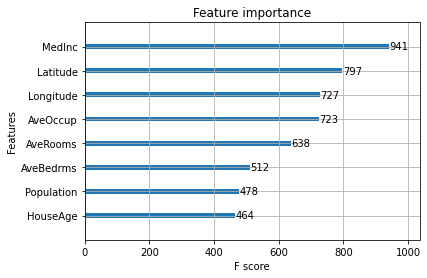

In [15]:
# 변수 중요도(feature importance)

plot_importance(xgb_model)

In [16]:
# 예측 결과 확인

predictions = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print('MAE: {}'.format(round(mae, 2)))
print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse, 2)))
print('R2: {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE: 29044.34
MSE: 1934591002.09
RMSE: 43983.99
R2: 0.88
adj_R2: 0.87


# LightGBM

- 부스팅 알고리즘
- XGBoost와 다른 점은 나무 분기 방식이 균형적으로 되는 것이 아니라 많이 틀린 leaf쪽으로 분기되어 나감
- 나무 분기를 불균형하게 해 나가는 방식(최대 손실을 줄이기 위한 방향으로)
- 학습 시간 빠름
- 데이터의 갯수가 적을 경우, 과적합 가능성이 큼(10,000개 이상의 데이터에 사용 권장)
- 분류, 회귀 문제 모두 적용 가능

In [17]:
from lightgbm import LGBMRegressor     # 분류 문제: LGBMClassifier

# 모델 학습

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [18]:
# 예측 결과 확인

predictions = lgbm_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print('MAE: {}'.format(round(mae, 2)))
print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse, 2)))
print('R2: {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE: 29719.96
MSE: 1897935988.91
RMSE: 43565.31
R2: 0.88
adj_R2: 0.87


# 앙상블 모델 간 성능 비교

In [19]:
# 모델별 성능 비교

mae, mse, rmse, r2, adj_r2 = [], [], [], [], []

for model in [mlr_model, rf_model, xgb_model, lgbm_model]:
    predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, predictions))
    mse.append(mean_squared_error(y_test, predictions))
    rmse.append(mse[-1] ** 0.5)
    r2.append(r2_score(y_test, predictions))
    adj_r2.append(1 - (1 - r2[-1]) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
    
perf_df = pd.DataFrame({'model': ['MRL(default)', 'RandomForest', 'XGBoost','LightGBM'],
                       'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'adj_R2': adj_r2})
perf_df

,model,MAE,MSE,RMSE,R2,adj_R2
0,MRL(default),54273.601374,5.703426e+09,75521.029619,0.632013,0.617145
1,RandomForest,30784.981449,2.255198e+09,47488.924318,0.854494,0.848615
2,XGBoost,29044.337164,1.934591e+09,43983.985746,0.875180,0.870136
3,LightGBM,29719.964458,1.897936e+09,43565.307171,0.877545,0.872597


- MAE, MSE, RMSE: 낮을수록 좋음
    - 따라서 MAE를 기준으로 봤을 땐, XGBoost의 성능이 가장 좋고, RMSE를 기준으로 봤을 땐, LightGBM의 성능이 가장 좋음
- R2: 높을수록 좋음
    - 따라서 R2를 기준으로 봤을 땐, LightGBM의 성능이 가장 좋음

Text(0.5, 1.0, 'R2')

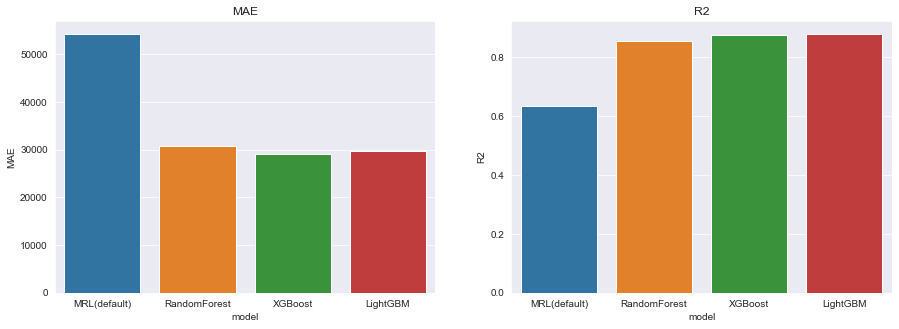

In [24]:
# 앙상블 모델 성능 시각화

sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# MAE

sns.barplot(data = perf_df, x = 'model', y = 'MAE', ax = axes[0])
axes[0].set_title('MAE')

# R2

sns.barplot(data = perf_df, x = 'model', y = 'R2', ax = axes[1])
axes[1].set_title('R2')